# T test

In this unit, I will provide a simple explanation of what is a t-test. Specifically, how to perform hypothesis testing with a p-value obtained from a t-test. I will talk about the test power and how to interpret the results. This discussion is also related to precision and recall.

In various explanations of a t-test, tutorials often choose to begin
with a real-world application. In my opinion, this can be misleading.
I choose to begin from a simple theoretical framework. Doing so will
explain various implicit assumptions (for example, the existence of
a data generating process) that are neglected in a real application
but necessary in understanding the subject.

Suppose a data generating process where numbers are generated from
a normal distribution. The density of normal is given by:

\begin{align*}
f(x|\mu,\sigma^{2}) & =\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}\right)
\end{align*}

where, $\mu = 1$ and $\sigma^{2} = 1$

In [11]:
import numpy as np
from scipy.stats import t

n = 15
mu = 1
sigma = np.sqrt(1)
np.random.seed(seed=12154)
X = np.random.normal(mu, sigma, n)  #draw 15 numbers from a random dist. with mean = 1 and variance = 1
print(X)

[-0.11976503  1.69133541  2.10420579  0.99091063  1.99561982 -0.77124923
  2.90362901  0.98192434  0.79232235 -0.25324058 -0.87846258 -0.76024629
  0.90918243  2.3521696   1.74099443]


Suppose that I can only see the numbers generated above, but I am interested in learning something about the data generating process. Let's assume that I am interested in learning something about the true mean, $\mu$. One popular way to learn something about the mean is through hypothesis testing. Specifically, I am interested in testing whether $\mu = 1.5$. More concretely:

\begin{align*}
H_{0}: & \mu=1.5\\
H_{1}: & \mu\neq1.5
\end{align*}

From there, I can move to constructing what is known as the t-statistic:

\begin{align*}
t & =\frac{\left(\bar{X}-\tilde{\mu}\right)}{\left(\hat{\sigma}(X)/\sqrt{n}\right)}
\end{align*}

where, $\bar{X}$ is the sample mean of my data, $\tilde{\mu}$ is
my hypothesized mean, $\hat{\sigma}(X)$ is the standard deviation of
my data, and $n$ is the number of observations (namely, 15). 


In [12]:
mu_telda = 1.5
tvalue =  (np.mean(X)- mu_telda)/(np.std(X)/np.sqrt(n))
print(tvalue)

-1.9150894216814496


The t-statistic represents the deviation of the sample mean from the hypothesized mean. If my hypothesized mean is equal to the true mean, then I should expect my t-statistic to approach zero. Since the t-statistic is only a single draw, I can't use it alone to make judgements. I must then find a way to examine the t-statistic as a single component of a larger distribution. We will do this next. Imagine the following thought process: I draw 15 numbers from the normal above an infinite number of times. Then, I use the infinite number of t's to draw a distribution. Mathematically speaking, since the numbers are drawn from normal, the resulting distribution from the infinite t's will be a t-distribution (hence, a t-test) with $n-1$ degrees of freedom. 

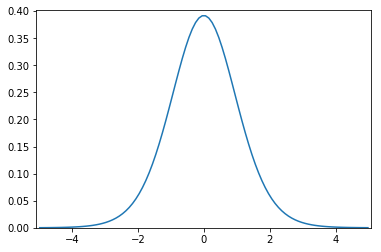

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

dfreedom = n - 1
TDist = t(df=dfreedom, loc=0, scale=1)
x = np.linspace(TDist.ppf(0.0001), TDist.ppf(0.9999), 100) #T-value for percentages between 0% and 100%
y = TDist.pdf(x)

plt.xlim(np.min(x)-.1,np.max(x)+.1)
plt.ylim(0,np.max(y)+.01)
plt.plot(x,y)
plt.margins(x=0, y= 0)

Having done that, now I can think of my t-statistic as a single draw from the above t-distribution

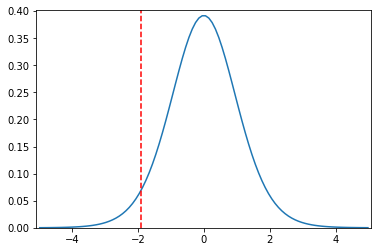

In [14]:
plt.xlim(np.min(x)-.1,np.max(x)+.1);
plt.ylim(0,np.max(y)+.01);
plt.plot(x,y);
plt.margins(x=0, y= 0);
plt.axvline(x=tvalue, color = 'red', linestyle = '--');


Looking back at my hypothesis, I am interested in testing if the true mean is equal to 1.5. Statistically, the question can be reframed as follows: what is the probability of deviating from my hypothesized mean (getting a t-value) to a degree equal to or more extreme than my current deviation (my t-value)? This is known as a two-tailed p-value and can be written as follows:

\begin{align*}
p= & 2*Prob\left(T>|t|\right)\\
= & 2*\left\{ Prob\left(T>t\right)\text{ or }Prob\left(T<-t\right)\right\} 
\end{align*}

Since the t-distribution is symmetric, I can find the probability of getting one extreme and multiply it by two. To find one probability, I can simply look at one minus the probability from the cumulative t-distribution for my t-value. This can be easily looked up using Python 

In [15]:
pvalue_onetail = t.sf(np.abs(tvalue), dfreedom) #1 - cdf of t
pvalue = 2*pvalue_onetail
print('Probability for one tail:  ',round(pvalue_onetail,3))
print('P-value:  ',round(pvalue,3))

Probability for one tail:   0.038
P-value:   0.076


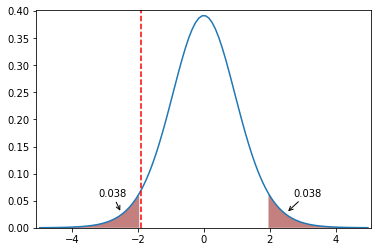

In [16]:
#I can graph the P-value
plt.xlim(np.min(x)-.1,np.max(x)+.1);
plt.ylim(0,np.max(y)+.01);
plt.plot(x,y);
plt.margins(x=0, y= 0);
plt.axvline(x=tvalue, color = 'red', linestyle = '--');
plt.fill_between(x[x<tvalue], y[x<tvalue], facecolor='darkred', alpha=0.5); #Values less likely from one tail
plt.fill_between(x[x>-tvalue], y[x>-tvalue], facecolor='darkred', alpha=0.5); #Values less likely from the other tail


Value = np.round(pvalue_onetail,3)
Arrow_x_scaler = np.abs(tvalue)+.6
text_x_scaler = np.abs(tvalue)+.8

Arr_y_scaler = pvalue_onetail-.01
Text_y_scaler = pvalue_onetail+.02


plt.annotate(Value, xy=(Arrow_x_scaler, Arr_y_scaler), xytext=(text_x_scaler,Text_y_scaler),
            arrowprops=dict(facecolor='black', arrowstyle="->"),
            );

plt.annotate(Value, xy=(-1*Arrow_x_scaler, Arr_y_scaler), xytext=(-1*text_x_scaler-.5, Text_y_scaler),
            arrowprops=dict(facecolor='black', arrowstyle="->"),
            );

#### It is important to keep in mind two assumptions that make this calculation possible:
<ol>
  <li>Sample is drawn at random: otherwise we can't use a distribution </li>
  <li>Sample is drawn from normal for a small sample. For a large sample, central limit theorem makes it matter less. </li>
</ol> 

#### Type I and Type II Errors

The smaller the p-value then the less likely that my hypothesis of $\mu = 1.5$ to be true. However, I want to make a final decision of whether $\mu = 1.5$  or not. This is often called "rejecting the null." The latter is a final decision made by the researcher claiming that the hypothesis is not true. To make that decision, a researcher selects a value, $\alpha$ , often between 0.01 and 0.1. If the p-value is less than the alpha then the null can be rejected. The choice of $\alpha$ often depends on the field of research. For this example, I will select an  $\alpha = .05$. Given a p-value of .076 then I fail to reject the null. In other words, I decide that $\mu = 1.5$. This is wrong, and it is called a Type I error. 


|                                |        Truth: $\mu=1.5$       |      Truth: $\mu\neq1.5$     |
|:------------------------------:|:-----------------------------:|:----------------------------:|
| **Fail to Reject Null:** $\mu=1.5$ |            Correct            | Type I Error: False Positive |
|   **Reject Null:**  $\mu\neq1.5$   | Type II Error: False Negative |            Correct           |


#### Precision and Recall

In machine learning, more specifically classification models, precision
and recall are two measures used to evaluate accuracy. It turns out that the discussion with regards to type I and type II errors is related to precision and recall. Suppose that there is a model that takes pictures as inputs
and classifies them as being cat pictures or not. For a single image:

|                     |           Truth: Cat          |        Truth: not Cat        |
|:-------------------:|:-----------------------------:|:----------------------------:|
|   **Classifier: Cat**   |            Correct            | Type I Error: False Positive |
| **Classifier: Not Cat** | Type II Error: False Negative |            Correct           |






Based on that information:

\begin{align*}
\text{Precision}= & \frac{\text{True Positives}}{\text{True Positives}+\text{False Positives}}\\
\\
\text{Recall}= & \frac{\text{True Positives}}{\text{True Positives}+\text{False Negatives}}
\end{align*}

Intuitively, precision examines accuracy of retrieved information,
while recall looks at how well does the model retrieve information
over the entire sample. Both measures are often combined in a single
measure, for example $F-score$, to assess overall accuracy of the
model. 

